In [1]:
#instala as bibliotecas necessárias para a execução
!pip install pandas
!pip install seaborn
!pip install numpy
!pip install matplotlib
!pip install sklearn

In [2]:
#importando as bibliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import warnings

#serão ignoradas todas mensagens de warning (aviso) que aparecer no notebook
warnings.filterwarnings('ignore')

## Abrindo o arquivo com os dados

In [3]:
arquivo_xls = pd.ExcelFile('data/teste_smarkio_Lbs.xls')
dados_analise_ml = pd.read_excel(arquivo_xls, 'Análise_ML')
dados_nlp = pd.read_excel(arquivo_xls, 'NLP')

In [4]:
#esses dados serão utilizados para resolver as atividades de 1 a 4.
dados_analise_ml.head(5)

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN


In [5]:
#esses dados serão utilizados para resolver a atividade 5.
dados_nlp.head(5)

,letra,artista
0,Jay-z Uh-uh-uh You ready b? Let's go get 'em. ...,Beyoncé
1,Your challengers are a young group from Housto...,Beyoncé
2,"Dum-da-de-da Do, do, do, do, do, do (Coming do...",Beyoncé
3,If I ain't got nothing I got you If I ain't go...,Beyoncé
4,Six inch heels She walked in the club like nob...,Beyoncé


## Atividades

### 1- Análise exploratória dos dados utilizando estatística descritiva e inferencial,considerando uma, duas e/ou mais variáveis.

In [6]:
#pred_class = classe que foi identificada pelo modelo
#probabilidade = a probabilidade da classe que o modelo identificou
#status = status da classificação de acordo com um especialista
#true_class = classe verdadeira. Se for nula, assumir o valor do pred_class
#se pred_class = true_class, então o modelo acertou a classe

In [7]:
#nós temos um total de 643 dados (também podemos chamar de linhas) e 4 colunas
dados_analise_ml.shape

(643, 4)

In [8]:
#primeiramente iremos analisar os tipos das colunas que temos
#'pred_class', 'probabilidade' e 'true_class' são colunas numéricas
#'status' é do tipo object. Ou seja, se trata de uma coluna categórica
dados_analise_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pred_class     643 non-null    int64  
 1   probabilidade  643 non-null    float64
 2   status         643 non-null    object 
 3   True_class     181 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 20.2+ KB


In [9]:
dados_analise_ml.describe(include='all') #iremos incluir todas as colunas, até mesmo as categóricas (status)

#a única coluna que possui valores nulos é a 'true_class', elas serão tratadas posteriormente
#a coluna 'status' só possui dois valores possíveis

,Pred_class,probabilidade,status,True_class
count,643.000000,643.000000,643,181.000000
unique,NaN,NaN,2,NaN
top,NaN,NaN,approved,NaN
freq,NaN,NaN,600,NaN
mean,52.712286,0.622436,NaN,38.574586
std,37.602068,0.266811,NaN,39.581017
min,2.000000,0.043858,NaN,0.000000
25%,12.000000,0.408017,NaN,0.000000
50%,59.000000,0.616809,NaN,24.000000
75%,81.000000,0.870083,NaN,74.000000


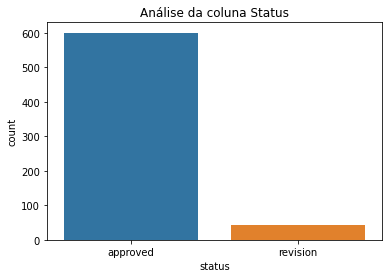

In [10]:
#analisando a coluna 'status'

fig = plt.figure(figsize=(6, 4))
plt.title('Análise da coluna Status')
sns.countplot(dados_analise_ml['status'])
fig.savefig('images/analise_status.png')

#a coluna 'status' possui dois tipos de valores: approved e revision
#approved é o valor que aparece com mais frequência (600), o que representa, aproximadamente, 93% do total
#revision aparece somente 43 vezes
#isso indica que temos mais dados aprovados do que os que precisam de uma revisão

In [11]:
#analisando a coluna 'true_class'
dados_analise_ml_semnull = dados_analise_ml.copy() #armazenando uma cópia do nosso dataframe em outra variável

#iremos fazer uma iteração em cada linha do nosso dataframe
for index, linha in dados_analise_ml_semnull.iterrows():
    
    #verificamos se o valor para 'True_class' é nan (nulo)
    if np.isnan(linha['True_class']):
        
        #se for nulo, iremos armazenar o valor do 'Pred_class' no seu lugar
        dados_analise_ml_semnull.loc[index, 'True_class'] = linha['Pred_class']

In [12]:
#verificando se ainda existe algum valor nulo no dataframe e se a inserção funcionou
dados_analise_ml_semnull.isnull().sum()

Pred_class       0
probabilidade    0
status           0
True_class       0
dtype: int64

In [13]:
#verificando se inserimos os valores certos

#será criado um dataframe temporário para fazermos a comparação
#teremos duas colunas 'True_class': a da esquerda é antes de ser tratada e a direita depois de ser tratada.
#veremos que os valores foram inseridos corretamente
temp_data = pd.concat([dados_analise_ml, dados_analise_ml_semnull['True_class']], axis=1)
temp_data.tail(30)

,Pred_class,probabilidade,status,True_class,True_class
613,24,0.287126,revision,NaN,24.0
614,60,0.511118,revision,NaN,60.0
615,2,0.331168,revision,NaN,2.0
616,3,0.399808,revision,NaN,3.0
617,4,0.405327,revision,NaN,4.0
618,22,0.324137,revision,NaN,22.0
619,24,0.737133,revision,NaN,24.0
620,39,0.812112,revision,NaN,39.0
621,39,0.812112,revision,NaN,39.0
622,43,0.725794,revision,NaN,43.0


In [14]:
#deleta a variável temporária já que não usaremos ela para mais nada
del temp_data

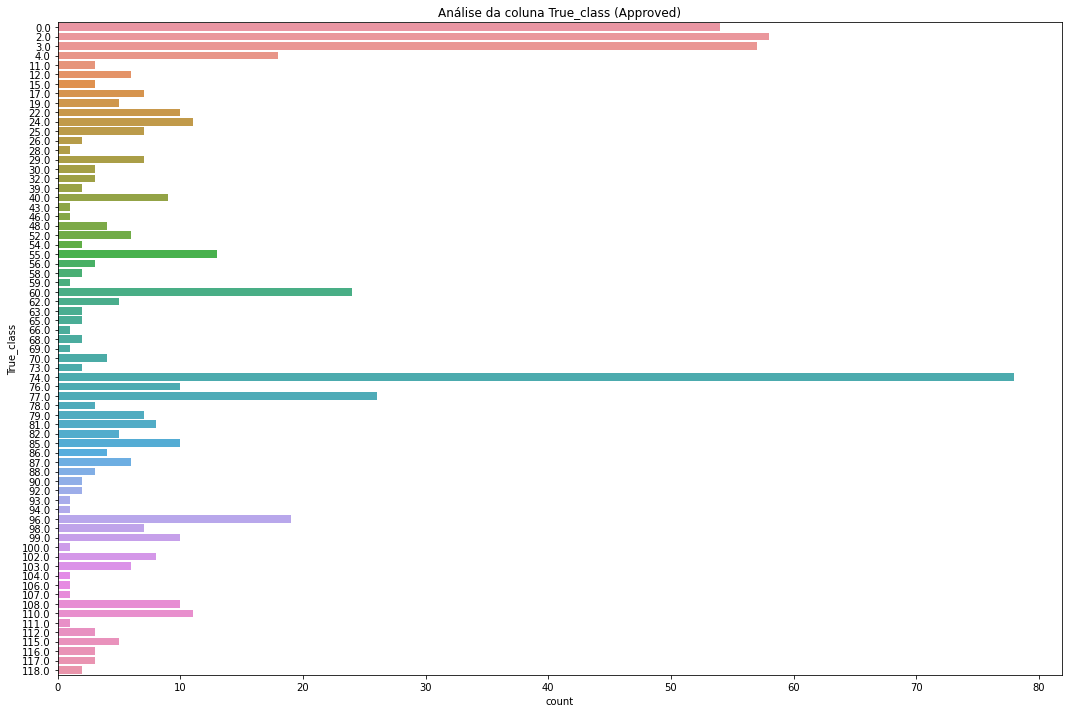

In [15]:
#usaremos só os dados onde o status é 'approved', pois foram confirmados e aprovados pelos cientistas
dados_analise_ml_semnull_approved = dados_analise_ml_semnull[dados_analise_ml_semnull['status'] == 'approved'].copy()

fig = plt.figure(figsize=(18, 12))
plt.title('Análise da coluna True_class (Approved)')
sns.countplot(y=dados_analise_ml_semnull_approved['True_class'], orient='h')
fig.savefig('images/analise_true_class.png')

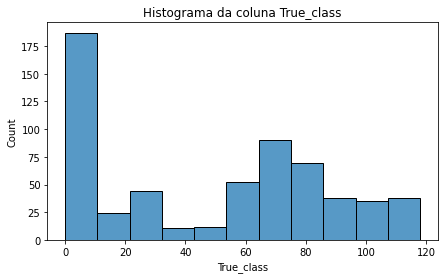

In [16]:
#analisando o histograma da coluna 'True_class'
fig = plt.figure(figsize=(7, 4))
plt.title('Histograma da coluna True_class')
sns.histplot(dados_analise_ml_semnull_approved['True_class'])
fig.savefig('images/histograma_true_class.png')

#através do gráfico anterior (countplot) e do histograma mostrado abaixo
#podemos perceber que as classes não são uniformemente distribuída, pois temos
#mais classes 0, 2, 3, 4, 60, 74 e 77 do que as demais. Principalmente a 74.

#podemos perceber também que os dados tem uma forma parecida com a de 
# dados que são assimétrico para a esquerda (positivo)

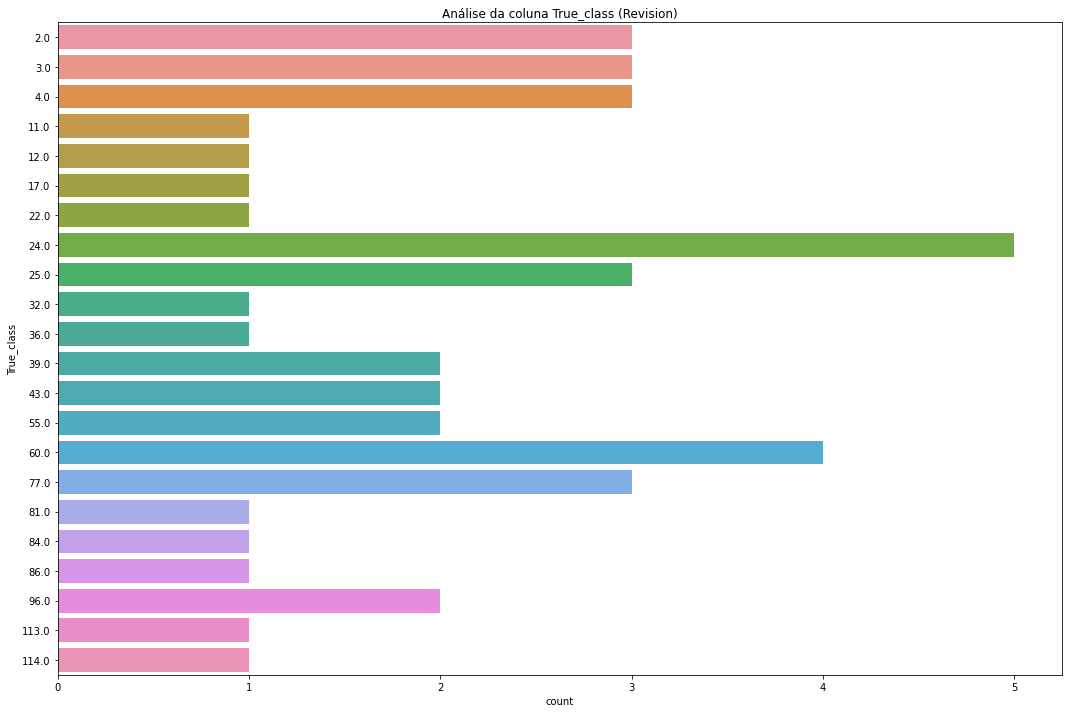

In [17]:
#usaremos só os dados onde o status é 'revision'
dados_analise_ml_semnull_revision = dados_analise_ml_semnull[dados_analise_ml_semnull['status'] == 'revision'].copy()

fig = plt.figure(figsize=(18, 12))
plt.title('Análise da coluna True_class (Revision)')
sns.countplot(y=dados_analise_ml_semnull_revision['True_class'], orient='h')
fig.savefig('images/analise_true_class_revision.png')

#o compartamento dos dados com status 'revision' são parecidos com os dados
#que possuem status 'approved'

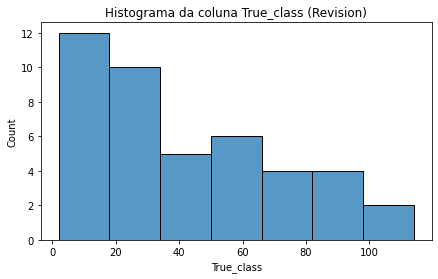

In [18]:
#analisando o histograma da coluna 'True_class' (revision)
fig = plt.figure(figsize=(7, 4))
plt.title('Histograma da coluna True_class (Revision)')
sns.histplot(dados_analise_ml_semnull_revision['True_class'])
fig.savefig('images/histograma_true_class_revision.png')

In [19]:
#temos um total de 69 classes diferentes (Approved)
dados_analise_ml_semnull_approved['True_class'].nunique()

69

In [20]:
#temos um total de 73 classes diferentes (Total)
dados_analise_ml_semnull['True_class'].nunique()

73

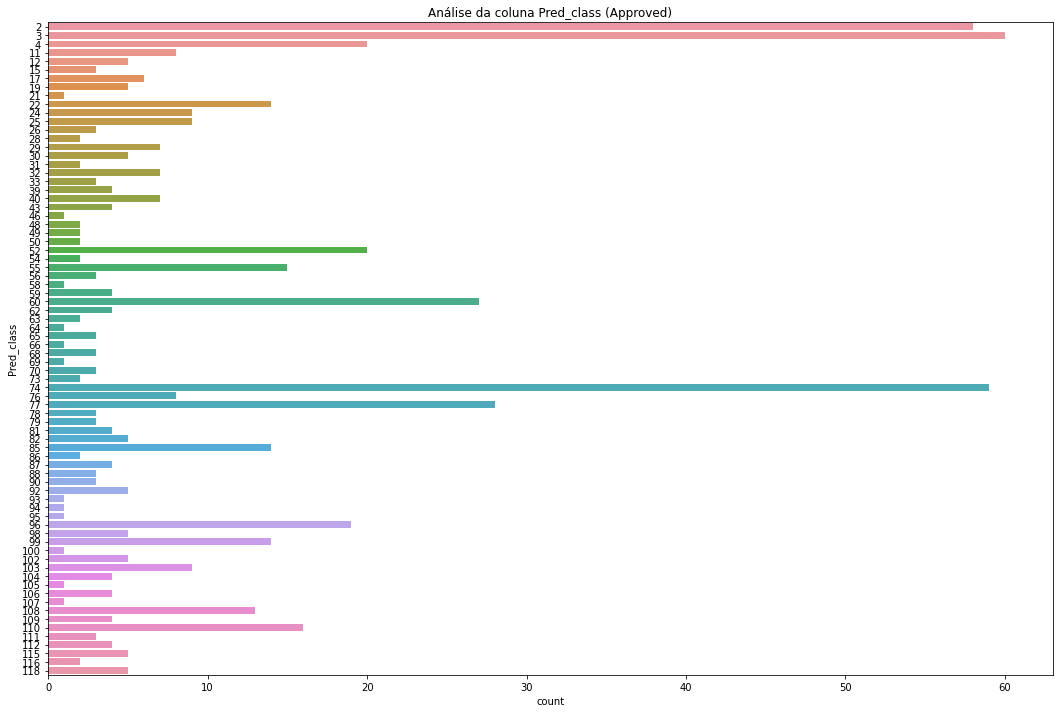

In [21]:
#analisando a coluna 'pred_class'
dados_analise_ml_semnull_approved = dados_analise_ml_semnull[dados_analise_ml_semnull['status'] == 'approved'].copy()

fig = plt.figure(figsize=(18, 12))
plt.title('Análise da coluna Pred_class (Approved)')
sns.countplot(y=dados_analise_ml_semnull_approved['Pred_class'], orient='h')
fig.savefig('images/analise_pred_class.png')

#as classes que mais apareceram na coluna 'Pred_class', que são os valores previstos pelo modelo
#também são as que mais apareceram na coluna 'True_class', que são: 2, 3, 4, 60, 74 e 77.
#o único que não aparece é a classe 0.
#isso pode indicar que o valor 0, que está presente na coluna 'True_class', não representa uma classe
#e pode ter sido um erro de digitação ou que o modelo tem dificuldades para reconhece-la

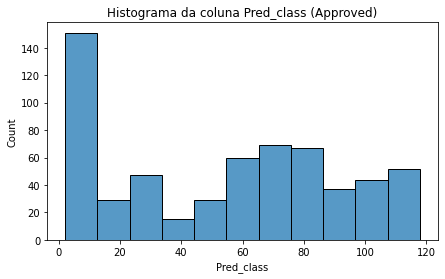

In [22]:
#analisando o histograma da coluna 'Pred_class'
fig = plt.figure(figsize=(7, 4))
plt.title('Histograma da coluna Pred_class (Approved)')
sns.histplot(dados_analise_ml_semnull_approved['Pred_class'])
fig.savefig('images/histograma_pred_class.png')

In [23]:
#criando uma nova coluna no nosso dataframe para verificarmos se o algoritmo acertou a classe
#se o classe real = prevista, colocamos o valor 1. Se não, o valor 0.
dados_analise_ml_semnull_approved['Acertou'] = np.where(dados_analise_ml_semnull_approved['Pred_class'] == dados_analise_ml_semnull_approved['True_class'],
                                                        1, 0)

In [24]:
dados_analise_ml_semnull_approved.head(10)

,Pred_class,probabilidade,status,True_class,Acertou
0,2,0.079892,approved,0.0,0
1,2,0.379377,approved,74.0,0
2,2,0.379377,approved,74.0,0
3,2,0.420930,approved,74.0,0
4,2,0.607437,approved,2.0,1
5,2,0.690894,approved,2.0,1
6,2,0.759493,approved,2.0,1
7,2,0.834910,approved,2.0,1
8,2,0.861396,approved,2.0,1
9,2,1.000000,approved,2.0,1


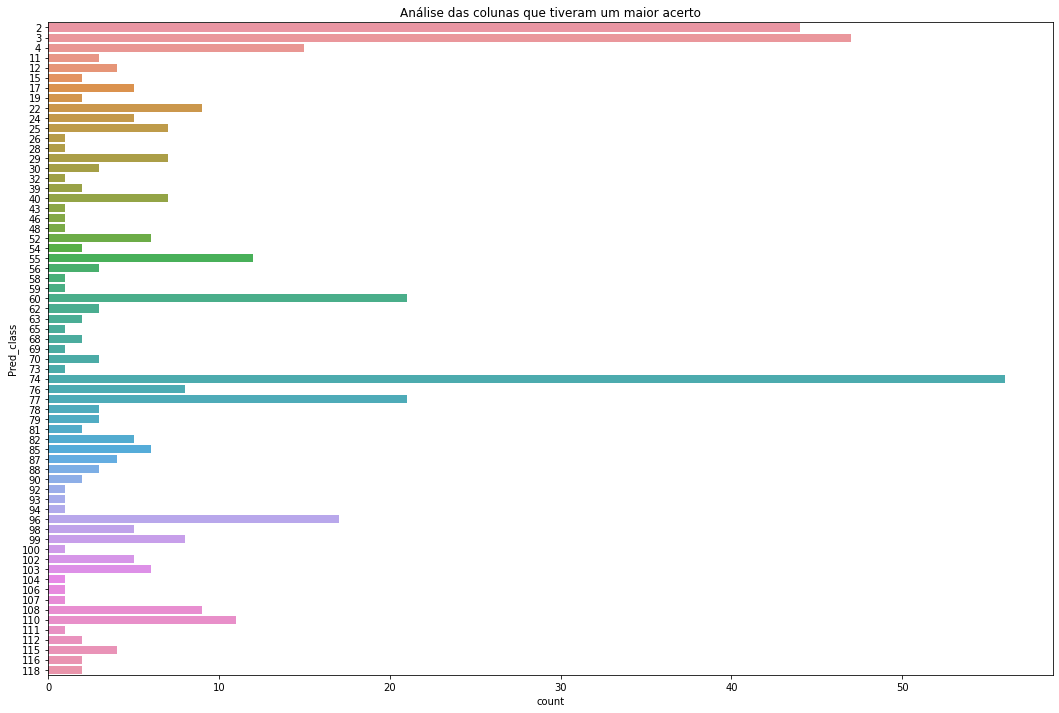

In [25]:
#analisando as classes que tiveram o maior número de acertos
dados_analise_ml_semnull_approved_acertou = dados_analise_ml_semnull_approved[dados_analise_ml_semnull_approved['Acertou'] == 1]

fig = plt.figure(figsize=(18, 12))
plt.title('Análise das colunas que tiveram um maior acerto')
sns.countplot(y=dados_analise_ml_semnull_approved_acertou['Pred_class'], orient='h')
fig.savefig('images/analise_classes_maior_acerto.png')

### 2- Calcule o desempenho do modelo de classificação utilizando pelo menos três métricas.

In [26]:
#Por se tratar de um problema de classificação, as métricas utilizadas são voltadas para
#esse tipo de problema.
#Um problema de classificação consiste em atribuir uma classe, dentre todas as possibilidades possíveis,
#para uma determinada entrada.

#### Confusion Matrix

Text(195.0, 0.5, 'True_class')

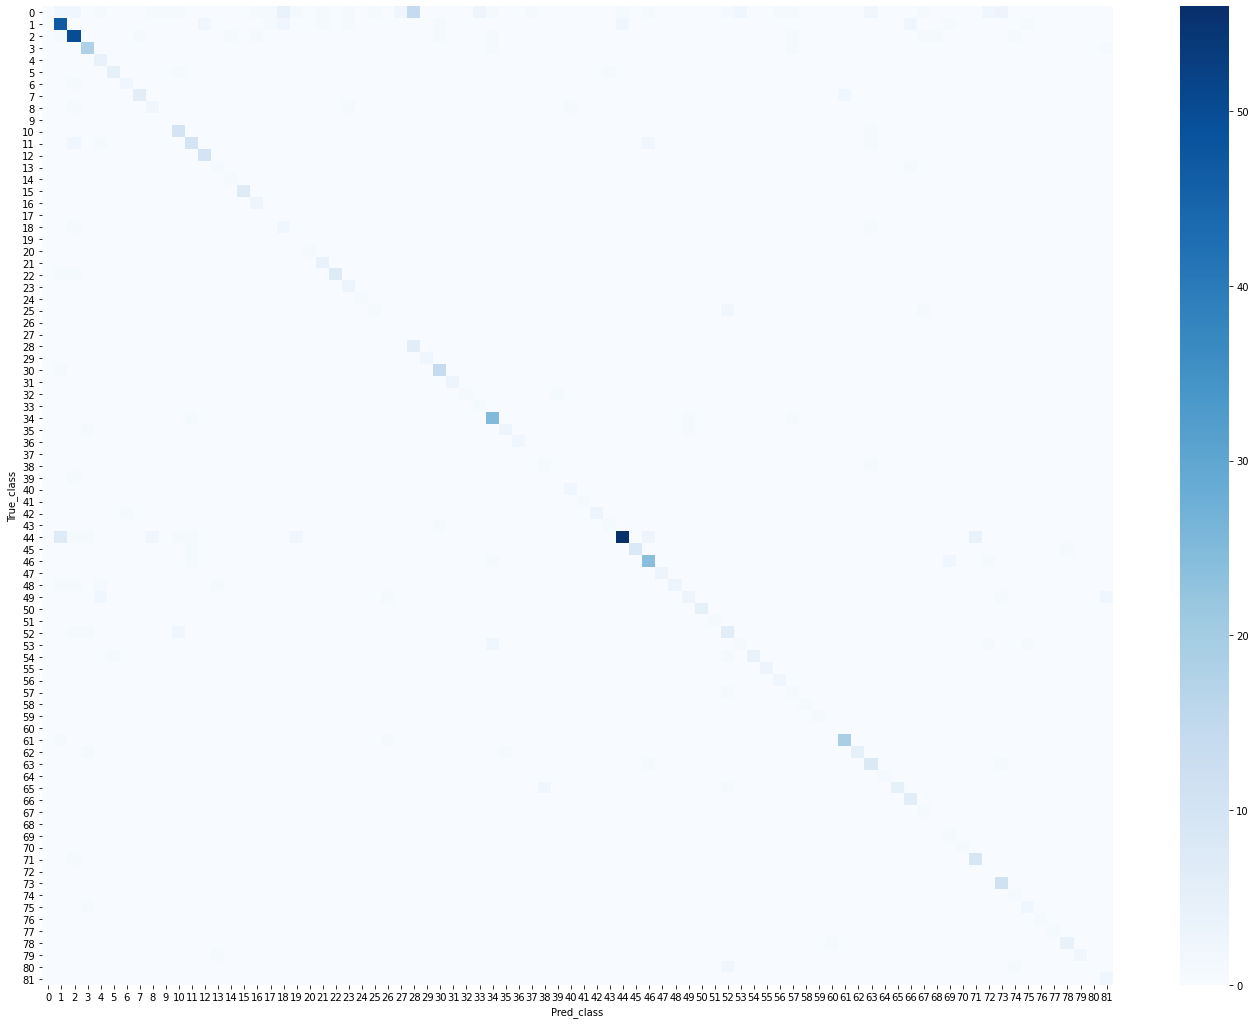

In [27]:
confusion_matrix = confusion_matrix(dados_analise_ml_semnull['True_class'],
                                    dados_analise_ml_semnull['Pred_class'])

fig = plt.figure(figsize=(24, 18))
sns.heatmap(confusion_matrix, cmap='Blues')
plt.xlabel('Pred_class')
plt.ylabel('True_class')

#a confusion matrix (matriz de confusão) é boa para podermos visualizar os falsos negativos e positivos
#das classes.
#as áreas mais escuras quer dizer que teve uma maior ocorrência. 
#podemos observar que existem algumas áreas escuras fora da diagonal principal da matriz
#nosso modelo confunde bastante o 0 com o 28 e o 44 com o 0.

#### Accuracy Score

In [28]:
score = accuracy_score(dados_analise_ml_semnull_approved['True_class'],
                       dados_analise_ml_semnull_approved['Pred_class'])

score

0.6983333333333334

#### F1 Score

In [29]:
#calcula o score considerando os valores do 'recall score' e 'precision score'
score = f1_score(dados_analise_ml_semnull_approved['True_class'],
                 dados_analise_ml_semnull_approved['Pred_class'],
                 average='weighted')

score

0.6831017455927221

#### Recall Score

In [30]:
#calcula o score considerando os falsos negativo e verdadeiro positivo
score = recall_score(dados_analise_ml_semnull_approved['True_class'],
                     dados_analise_ml_semnull_approved['Pred_class'],
                     average='weighted')

score

0.6983333333333334

#### Precision Score

In [31]:
#calcula o score considerando os falsos positivos e verdadeiro positivo
score = precision_score(dados_analise_ml_semnull_approved['True_class'],
                        dados_analise_ml_semnull_approved['Pred_class'],
                        average='weighted')

score

0.6988175116236557

### 3- Crie um classificador que tenha como output se os dados com status igual a revision estão corretos ou não (Sugestão : Técnica de cross-validation K-fold).

In [32]:
X_train = dados_analise_ml_semnull_approved['Pred_class']
y_train = dados_analise_ml_semnull_approved['True_class']

#pega somente as linhas onde o status é 'revision'
dados_analise_ml_revision = dados_analise_ml_semnull[dados_analise_ml_semnull['status'] == 'revision'].copy()

X_test = dados_analise_ml_revision['Pred_class']
y_test = dados_analise_ml_revision['True_class']

In [33]:
from sklearn.ensemble import RandomForestClassifier

#para que possamos treinar o nosso classificador, primeiro devemos converter nossos
#valores para um array de numpy.
#isso deverá ser feito para que os nossos valores tenham a dimensão correta.
#deverá ser feito tanto para o X_train quanto o X_test
X_train_array = np.array(X_train)
X_train_array = X_train_array.reshape(-1, 1)

X_test_array = np.array(X_test)
X_test_array = X_test_array.reshape(-1, 1)

random_forest = RandomForestClassifier(random_state=23)

#treinando o modelo com os dados que possuem status 'approved'
random_forest.fit(X_train_array, y_train)

#testando o modelo com os dados que possuem status 'revision'
pred = random_forest.predict(X_test_array)
pred

array([  2.,  24.,  24.,  25.,  25.,  25.,   0.,  55.,  77.,  77.,   0.,
       115.,  11.,  24.,  60.,   2.,   3.,   4.,  22.,  24.,  39.,  39.,
         0.,  60.,  81.,  96., 112.,   2.,   3.,   3.,   4.,   4.,  12.,
        17.,  24.,  74.,   0.,  55.,  60.,  60.,  77.,  85.,  96.])

In [34]:
#criando um novo dataframe para podermos visualizar melhor a classe prevista e a classe real
dataframe_comparacao = pd.DataFrame({
    'Classe_real': y_test,
    'Classe_prevista': pred
})

#criando uma nova coluna no nosso dataframe para verificarmos se o algoritmo acertou a classe
#se o classe real = prevista, colocamos o valor 1. Se não, o valor 0.
dataframe_comparacao['Acertou'] = np.where(dataframe_comparacao['Classe_real'] == dataframe_comparacao['Classe_prevista'],
                                          1, 0)

dataframe_comparacao

,Classe_real,Classe_prevista,Acertou
600,2.0,2.0,1
601,24.0,24.0,1
602,24.0,24.0,1
603,25.0,25.0,1
604,25.0,25.0,1
605,25.0,25.0,1
606,32.0,0.0,0
607,55.0,55.0,1
608,77.0,77.0,1
609,77.0,77.0,1


In [35]:
#podemos ver que o modelo acertou uma grande quantidade de dados que estavam com status 'revision'
print("Total de acertos: " + str(dataframe_comparacao['Acertou'].sum()) + " de " + str(dataframe_comparacao.shape[0]))
print("Porcentagem: " + str(dataframe_comparacao['Acertou'].sum()/dataframe_comparacao.shape[0]))

#iremos obter um score de, aproximadamente, 0.814 no classificador criado
#isso poderia ser melhorado usando outros algoritmos mais eficientes (por exemplo: XGBoost e LightGBM)
#e também usando técnicas para melhorar os hiper parâmetros do modelo (GridSearch, RandomSearch ou Optuna)

Total de acertos: 35 de 43
Porcentagem: 0.813953488372093


### 4- Compare três métricas de avaliação aplicadas ao modelo e descreva sobre a diferença.

#### Accuracy Score

In [36]:
#calcula o score utilizando verdadeiro positivo, verdadeiro negativo, falso positivo e falso negativo
#fórmula= (vp + vn) / (vp + vn + fp + fn)
#vp= verdadeiro positivo
#vn= verdadeiro negativo
#fp= falso positivo
#fn= falso negativo

score = accuracy_score(dataframe_comparacao['Classe_real'],
                       dataframe_comparacao['Classe_prevista'])

score

0.813953488372093

#### Recall Score

In [37]:
#calcula o score utilizando verdadeiro positivo e falso negativo
#fórmula= vp / (vp + fn)
#vp= verdadeiro positivo
#fn= falso negativo

#estamos usando o 'weighted' para calcular o score de cada classe e aplicando um peso sobre ele
#no nosso caso, como as classes não estão distribuídas de forma uniforme é necessário usar o peso
#para que o score fique balanceado
score = recall_score(dataframe_comparacao['Classe_real'],
                     dataframe_comparacao['Classe_prevista'],
                     average='weighted')

score

0.813953488372093

In [38]:
#utilizando o 'macro' só iremos calcular o score de classe e não aplicamos um peso sobre ela
#podemos notar a diferença de um score para o outro
score = recall_score(dataframe_comparacao['Classe_real'],
                     dataframe_comparacao['Classe_prevista'],
                     average='macro')

score

0.5555555555555556

#### Precision Score

In [39]:
#calcula o score utilizando verdadeiro positivo e falso positivo
#fórmula= vp / (vp + fp)
#vp= verdadeiro positivo
#fp= falso positivo

#estamos usando o 'weighted' para calcular o score de cada classe e aplicando um peso sobre ele
#no nosso caso, como as classes não estão distribuídas de forma uniforme é necessário usar o peso
#para que o score fique balanceado
score = precision_score(dataframe_comparacao['Classe_real'],
                        dataframe_comparacao['Classe_prevista'],
                        average='weighted')

score

0.813953488372093

In [40]:
#utilizando o 'macro' só iremos calcular o score de classe e não aplicamos um peso sobre ela
#podemos notar a diferença de um score para o outro
score = precision_score(dataframe_comparacao['Classe_real'],
                     dataframe_comparacao['Classe_prevista'],
                     average='macro')

score

0.5555555555555556

### 5- Crie um classificador, a partir da segunda aba - NLP do arquivo de dados, quepermita identificar qual trecho de música corresponde às respectivas artistas listadas (Sugestão: Naive Bayes Classifier).

In [41]:
#temos 518 dados e duas colunas
#colunas: letra e artista
#letra: trecho da música
#artista: cantora referente ao trecho da música (letra)
dados_nlp.shape

(518, 2)

In [42]:
#verificando se existe linhas com nulo
dados_nlp.describe()

,letra,artista
count,518,518
unique,517,2
top,All along it was a fever A cold sweat hot-head...,Beyoncé
freq,2,274


<AxesSubplot:title={'center':'Análise dos Artistas'}, xlabel='artista', ylabel='count'>

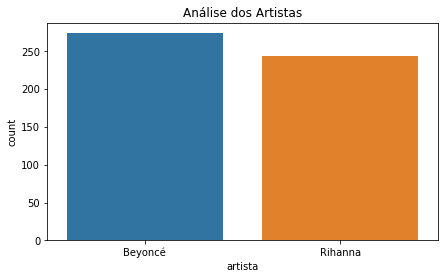

In [43]:
fig = plt.figure(figsize=(7, 4))
plt.title('Análise dos Artistas')
sns.countplot(dados_nlp['artista'])

#Temos dois artistas: Beyoncé e Rihanna
#Beyoncé aparece 274 vezes, aproximadamente 53% 
#Rihanna aparece 244 vezes, aproximadamente 47%

#### Criação do classificador

In [44]:
#separando os dados em X(features) e y(target)

X = dados_nlp['letra']
y = dados_nlp['artista']

#separando os dados para treinamento do classificador e para testá-lo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

#para a extração de features será utilizado o método bags of words
#o que esse método faz é associar um número inteiro para cada palavra
#e depois armazenará a quantidade de vezes que essa palavra apareceu.
#a função CountVectorizer já realiza todo esse processo de pré processamento e 
#tokenização (associar ao número inteiro) das palavras.
cv = CountVectorizer(stop_words='english')

X_train_tratado = cv.fit_transform(X_train)
X_test_tratado = cv.transform(X_test)

naive_bayes = MultinomialNB()

#treinando o classificador
naive_bayes.fit(X_train_tratado, y_train)

#testando o classificador com os dados de teste
pred = naive_bayes.predict(X_test_tratado)
np.mean(pred == y_test)

#iremos obter um score de 0.75 no classificador criado
#isso poderia ser melhorado usando outros algoritmos mais eficientes (por exemplo o SVM), já que o Naive Bayes é mais básico
#e também usando técnicas para melhorar os hiper parâmetros do modelo (GridSearch, RandomSearch ou Optuna)

0.75